# Завдання

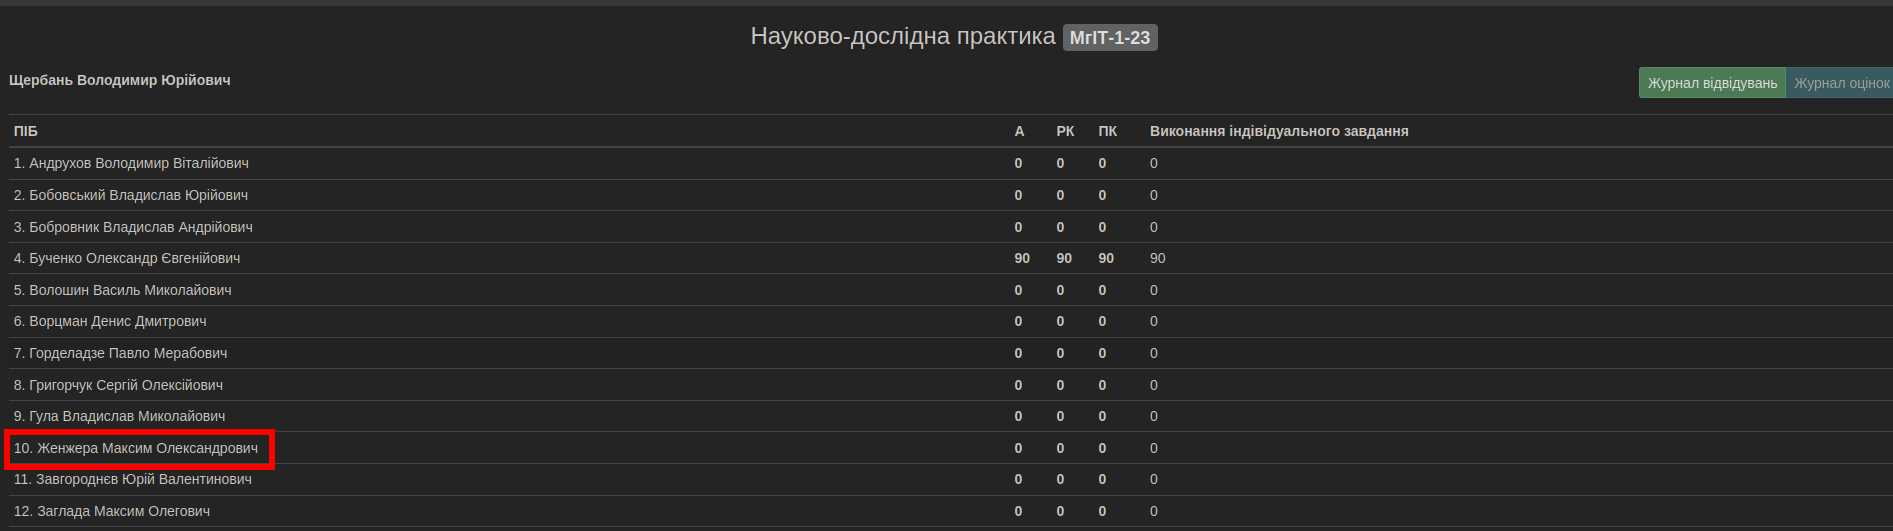
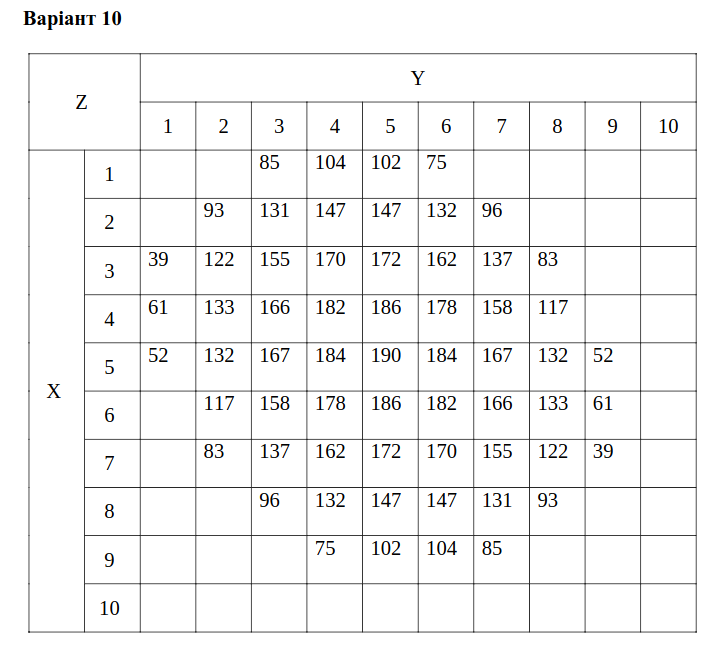

# Хід роботи

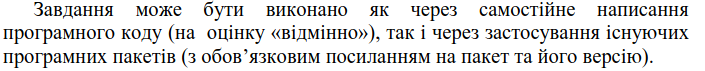
- numpy==1.26.4
- scipy==1.12.0
- matplotlib==3.8.3

## Підготовка

### Імпорт використаних бібліотек

In [18]:
%matplotlib inline

import math

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### Вхідні дані

In [7]:
x = np.array(range(1, 10 + 1))
y = np.array(range(1, 10 + 1))
z = np.array([
    [np.nan, np.nan, 85, 104, 102, 75, np.nan, np.nan, np.nan, np.nan],
    [np.nan, 93, 131, 147, 147, 132, 96, np.nan, np.nan, np.nan],
    [39, 122, 155, 170, 172, 162, 137, 83, np.nan, np.nan],
    [61, 133, 166, 182, 186, 178, 158, 117, np.nan, np.nan],
    [52, 132, 167, 184, 190, 184, 167, 132, 52, np.nan],
    [np.nan, 117, 158, 178, 186, 182, 166, 133, 61, np.nan],
    [np.nan, 83, 137, 162, 172, 170, 155, 122, 39, np.nan],
    [np.nan, np.nan, 96, 132, 147, 147, 131, 93, np.nan, np.nan],
    [np.nan, np.nan, np.nan, 75, 102, 104, 85, np.nan, np.nan, np.nan],
    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
])

## Розв'язок

### 1


Зпершу, зробимо графічний 3д образ вхідних даних.

Text(0.5, 0.92, 'surface')

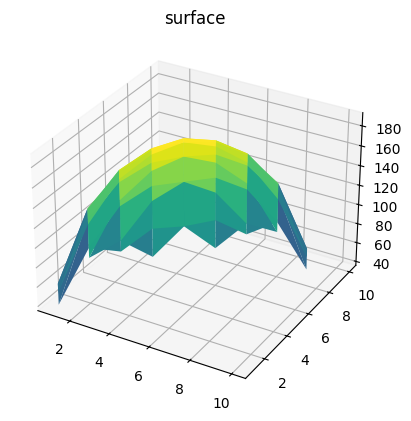

In [8]:
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')

За візуальним аналізом геометрична форма нагадує `еліптичний паралоїд`.

Ось так виглядає `еліптичний паралоїд` в канонічному вигляді.

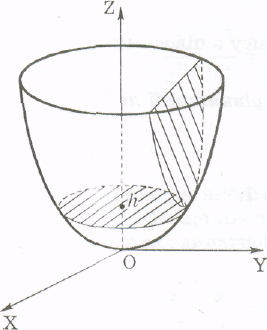
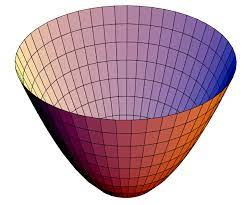

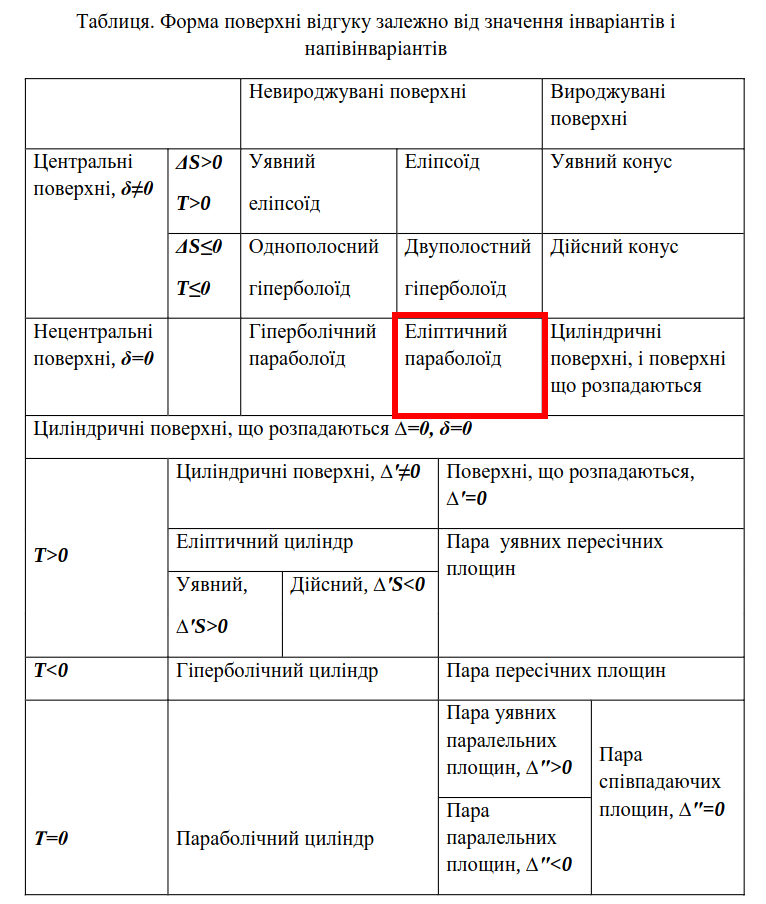

**Мною було вирішено** для апроксимацї використовувати рівняння `еліптичного паралоїду`. 

`Еліптичний параболоїд` можна описати рівнянням у канонічній формі з вершиною в точці ($h$, $k$, $z₀$):

$$
\frac{{(x - h)^2}}{{a^2}} + \frac{{(y - k)^2}}{{b^2}} = \frac{{(z - z₀)}}{{c^2}}
$$

- де $a$, $b$, $c$ - параметри, що визначають напрямок та розмір гілок;
- $h$, $k$, $z₀$- координати вершини.

За вхідними даними 
$$
(h, k, z₀) = (5, 5, 190)
$$

Гілки перегорнуті, що означає, що параболоїд відкритий вниз, то параметр $c$ буде від'ємним. 

Для зручності можна виразити це рівняння у вигляді:

$$
\frac{{(x - 5)^2}}{{a^2}} + \frac{{(y - 5)^2}}{{b^2}} = \frac{{z - 190}}{{-c^2}}
$$

Давайте спробуємо знайти значення параметрів $a$, $b$ та $c$ для рівняння еліптичного параболоїда з використанням наданих точок. 

Для цього ми будемо використовувати метод найменших квадратів, щоб знайти найкращі значення цих параметрів.

In [14]:
# Вибірка точок з вхідних даних
data_points = np.array([
    [5, 5, 190],
    [5, 1, 52],
    [5, 9, 52],
    [2, 5, 147],
    [8, 5, 147]
])


def objective(params: list[int], *args: list[int]) -> float:
    a, b, c = params
    points = args[0]
    hx, ky, z0 = args[1]
    return sum(((point[0] - hx) ** 2 / a ** 2 + (point[1] - ky) ** 2 / b ** 2 - (point[2] - z0) ** 2 / c ** 2 - 1) ** 2 for point in points)


# Початкові значення параметрів a, b, c
initial_guess = [1, 1, 1]

# Знаходження оптимальних параметрів методом найменших квадратів
top_point = [5, 5, 190]
result = minimize(objective, initial_guess, args=(data_points, top_point))

# Оптимальні значення параметрів a, b, c
a_optimal, b_optimal, c_optimal = result.x

print("Оптимальні значення параметрів:")
print("a:", a_optimal)
print("b:", b_optimal)
print("c:", c_optimal)

Оптимальні значення параметрів:
a: 0.1400399172514906
b: 0.05823815898243091
c: 2.009429493469202


Отже, оптимальні значення параметрів:
- $ a \approx 0.140 $
- $ b \approx 0.058 $
- $ c \approx 2.009 $

Рівняння еліптичного параболоїда з цими параметрами та вершиною в $ (5, 5, 190) $ матиме вигляд:

$$
\frac{{(x - 5)^2}}{{0.140^2}} + \frac{{(y - 5)^2}}{{0.058^2}} - \frac{{(z - 190)^2}}{{2.009^2}} = 0
$$

Це рівняння описує еліптичний параболоїд з гілками, спрямованими вниз і вершиною в $ (5, 5, 190) $, який найкраще пасує до ваших даних точок.

Рівняння еліптичного параболоїда, яке ми отримали, може бути переписане так, щоб виразити $ z $ відповідно до заданих $ x $ та $ y $ координат:

$$
z = 190 - 2.009 \sqrt{\frac{{(x - 5)^2}}{{0.140^2}} + \frac{{(y - 5)^2}}{{0.058^2}} - 1}
$$

Це рівняння дозволяє вам обчислити значення $ z $ для будь-якої заданої $ x $ та $ y $ на поверхні параболоїда з вказаними параметрами $ a $, $ b $ та $ c $. 

In [19]:
# z = f(x,y)
def approximate(x: int, y: int) -> float:
    return 190 - 2.009 * math.sqrt( ((x - 5)**2 / 0.140**2) + ((y - 5)**2 / 0.058**2))

In [20]:
approximated_z = np.array(
    [
        [approximate(x_, y_) for y_ in y]
        for x_ in x
    ]
)

In [22]:
np.set_printoptions(linewidth=np.inf)
approximated_z

array([[ 40.02886857,  71.28674717, 100.03386712, 122.95862273, 132.6       , 122.95862273, 100.03386712,  71.28674717,  40.02886857,   7.54612457],
       [ 44.91422275,  77.52165143, 108.43746224, 134.74523761, 146.95      , 134.74523761, 108.43746224,  77.52165143,  44.91422275,  11.54003486],
       [ 48.50699572,  82.19570325, 115.01443429, 145.01693356, 161.3       , 145.01693356, 115.01443429,  82.19570325,  48.50699572,  14.44845014],
       [ 50.70713313,  85.10005292, 119.25349786, 152.50721714, 175.65      , 152.50721714, 119.25349786,  85.10005292,  50.70713313,  16.2168617 ],
       [ 51.44827586,  86.0862069 , 120.72413793, 155.36206897, 190.        , 155.36206897, 120.72413793,  86.0862069 ,  51.44827586,  16.81034483],
       [ 50.70713313,  85.10005292, 119.25349786, 152.50721714, 175.65      , 152.50721714, 119.25349786,  85.10005292,  50.70713313,  16.2168617 ],
       [ 48.50699572,  82.19570325, 115.01443429, 145.01693356, 161.3       , 145.01693356, 115.01443429, 

### 2
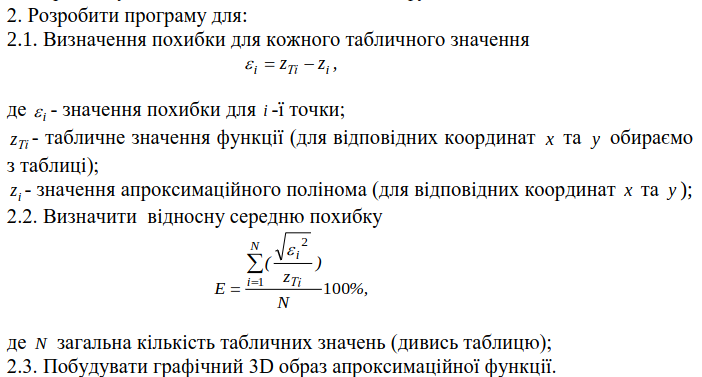

In [25]:
errors = z - approximated_z

In [37]:
# Вхідні дані
z

array([[ nan,  nan,  85., 104., 102.,  75.,  nan,  nan,  nan,  nan],
       [ nan,  93., 131., 147., 147., 132.,  96.,  nan,  nan,  nan],
       [ 39., 122., 155., 170., 172., 162., 137.,  83.,  nan,  nan],
       [ 61., 133., 166., 182., 186., 178., 158., 117.,  nan,  nan],
       [ 52., 132., 167., 184., 190., 184., 167., 132.,  52.,  nan],
       [ nan, 117., 158., 178., 186., 182., 166., 133.,  61.,  nan],
       [ nan,  83., 137., 162., 172., 170., 155., 122.,  39.,  nan],
       [ nan,  nan,  96., 132., 147., 147., 131.,  93.,  nan,  nan],
       [ nan,  nan,  nan,  75., 102., 104.,  85.,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]])

In [38]:
# Апроксимовані дані
approximated_z

array([[ 40.02886857,  71.28674717, 100.03386712, 122.95862273, 132.6       , 122.95862273, 100.03386712,  71.28674717,  40.02886857,   7.54612457],
       [ 44.91422275,  77.52165143, 108.43746224, 134.74523761, 146.95      , 134.74523761, 108.43746224,  77.52165143,  44.91422275,  11.54003486],
       [ 48.50699572,  82.19570325, 115.01443429, 145.01693356, 161.3       , 145.01693356, 115.01443429,  82.19570325,  48.50699572,  14.44845014],
       [ 50.70713313,  85.10005292, 119.25349786, 152.50721714, 175.65      , 152.50721714, 119.25349786,  85.10005292,  50.70713313,  16.2168617 ],
       [ 51.44827586,  86.0862069 , 120.72413793, 155.36206897, 190.        , 155.36206897, 120.72413793,  86.0862069 ,  51.44827586,  16.81034483],
       [ 50.70713313,  85.10005292, 119.25349786, 152.50721714, 175.65      , 152.50721714, 119.25349786,  85.10005292,  50.70713313,  16.2168617 ],
       [ 48.50699572,  82.19570325, 115.01443429, 145.01693356, 161.3       , 145.01693356, 115.01443429, 

In [46]:
# Значення похибки для кожного табличного значення
errors

array([[         nan,          nan, -15.03386712, -18.95862273, -30.6       , -47.95862273,          nan,          nan,          nan,          nan],
       [         nan,  15.47834857,  22.56253776,  12.25476239,   0.05      ,  -2.74523761, -12.43746224,          nan,          nan,          nan],
       [ -9.50699572,  39.80429675,  39.98556571,  24.98306644,  10.7       ,  16.98306644,  21.98556571,   0.80429675,          nan,          nan],
       [ 10.29286687,  47.89994708,  46.74650214,  29.49278286,  10.35      ,  25.49278286,  38.74650214,  31.89994708,          nan,          nan],
       [  0.55172414,  45.9137931 ,  46.27586207,  28.63793103,   0.        ,  28.63793103,  46.27586207,  45.9137931 ,   0.55172414,          nan],
       [         nan,  31.89994708,  38.74650214,  25.49278286,  10.35      ,  29.49278286,  46.74650214,  47.89994708,  10.29286687,          nan],
       [         nan,   0.80429675,  21.98556571,  16.98306644,  10.7       ,  24.98306644,  39.98556571, 

In [43]:
# Відносна середня похибка
N = np.count_nonzero(~np.isnan(z))
relative_average_error = np.nansum( np.abs(z - approximated_z) / z ) / N * 100

print('Відносна середня похибка: ', relative_average_error)

Відносна середня похибка:  18.570430480628332


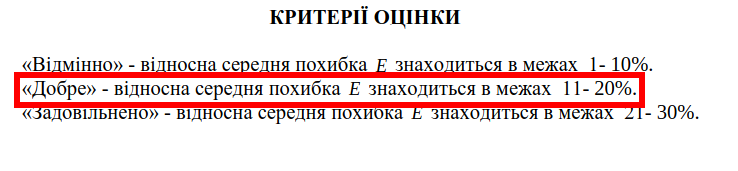

Побудуємо графічний 3д образ апроксимуючої функції.

Text(0.5, 0.92, 'approximated surface')

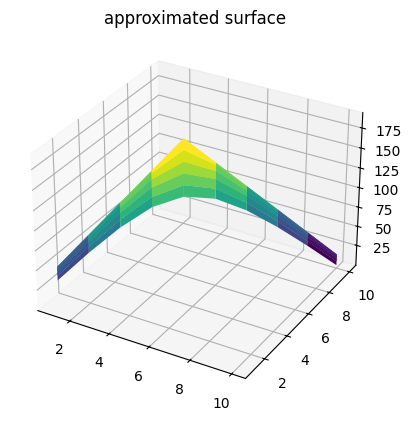

In [41]:
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, approximated_z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('approximated surface')